<a href="https://colab.research.google.com/github/QuangLe102/Classification_animal/blob/main/Classification_animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
pip install opensoundscape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 108 kB 29.9 MB/s 
     |████████████████████████████████| 793 kB 48.3 MB/s 
     |████████████████████████████████| 54.5 MB 150 kB/s 
     |████████████████████████████████| 8.8 MB 12.4 MB/s 
     |████████████████████████████████| 133 kB 55.6 MB/s 
     |████████████████████████████████| 132 kB 61.0 MB/s 
     |████████████████████████████████| 428 kB 46.9 MB/s 
     |████████████████████████████████| 381 kB 52.1 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 344 kB 49.0 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 561 kB 52.3 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 5

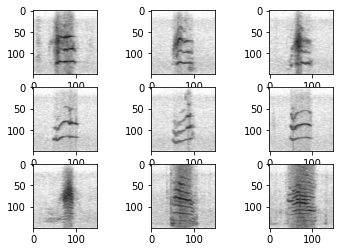

In [34]:
#import thư viện

from sklearn.utils import shuffle

import math as m

import cv2
import wave
import pylab
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

with open('../content/drive/MyDrive/Classification_CNN.pickle', 'rb') as f:
  (x_train, y_train), (x_test, y_test) = pickle.load(f)
x_pre = x_test
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [2]:
y_train.shape

(1800,)

In [3]:
y_test.shape

(200,)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(1800, 10)

In [5]:
from keras.layers.pooling import MaxPooling2D
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))

#ANN
model.add(Flatten())
model.add(Dense(64, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [6]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 30, batch_size=64, validation_data = (x_test, y_test), verbose = 1)
model.save('Classification.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
29/29 [==============================] - 76s 3s/step - loss: 2.5021 - accuracy: 0.1078 - val_loss: 2.2867 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 70s 2s/step - loss: 2.1955 - accuracy: 0.1583 - val_loss: 1.9834 - val_accuracy: 0.3900
Epoch 3/30
29/29 [==============================] - 71s 2s/step - loss: 1.8757 - accuracy: 0.2733 - val_loss: 1.6474 - val_accuracy: 0.3950
Epoch 4/30
29/29 [==============================] - 69s 2s/step - loss: 1.6660 - accuracy: 0.3483 - val_loss: 1.5606 - val_accuracy: 0.3200
Epoch 5/30
29/29 [==============================] - 69s 2s/step - loss: 1.6495 - accuracy: 0.3561 - val_loss: 1.5627 - val_accuracy: 0.3750
Epoch 6/30
29/29 [==============================] - 70s 2s/step - loss: 1.4793 - accuracy: 0.4283 - val_loss: 1.5326 - val_accuracy: 0.3300
Epoch 7/30
29/29 [==============================] - 68s 2s/step - loss: 1.5053 - accuracy: 0.4072 - val_loss: 1.8420 - val_accuracy: 0.2650
Epoch 8/30
29/29 [==

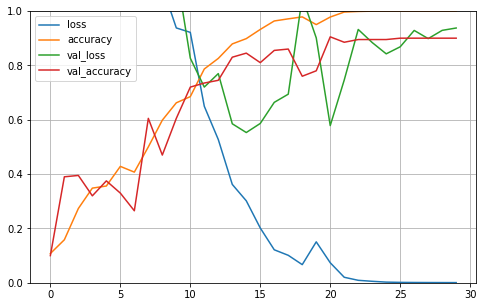

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [8]:
from keras.models import load_model
model1 = keras.models.load_model('../content/Classification.h5')

(150, 150, 3)
[0]


'CAT'

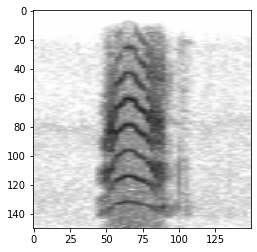

In [9]:
test =15
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1, 150, 150, 3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model1.predict(img), axis = 1)
print(pred)
Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
Label[pred[0]]

In [57]:
import IPython.display as ipd
import librosa.display
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def Classification (wav):
  ipd.display(ipd.Audio(wav))
  signal, sr = librosa.load(wav, duration=10)  # sr = sampling rate

  audio = Audio.from_file(wav)
  image_shape = (150, 150)
  spectrogram = Spectrogram.from_audio(audio)

  # Convert Spectrogram object to Python Imaging Library (PIL) Image
  image = spectrogram.to_image(shape=image_shape,invert=True)

  # Save image to file
  image.save("test.png")
  img = load_img("test.png", target_size = (150, 150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  img = img / 255
  pred = np.argmax(model1.predict(img), axis = 1)
  Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
  print(pred)
  print("The sound is predicted to be that of a "+Label[pred[0]])

[6]
The sound is predicted to be that of a MONKEY


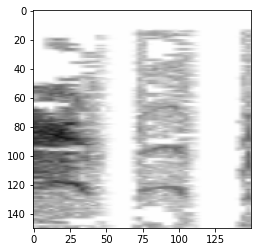

In [58]:
dir_wav = "../content/drive/MyDrive/WAV/7.MONKEY/10_51B_out_2.wav"
Classification (dir_wav)

[0]
The sound is predicted to be that of a CAT


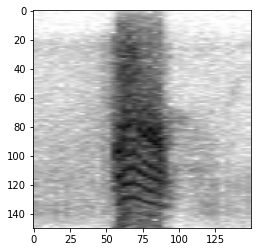

In [61]:
dir_wav = "../content/drive/MyDrive/WAV/1.CAT/B_BRA01_MC_MN_SIM01_105.wav"
Classification (dir_wav)

[7]


'GOAT'

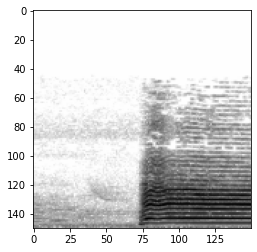

In [59]:
import IPython.display as ipd
import librosa.display
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img("../content/drive/MyDrive/DATASETS_SPLIT/TEST/8.GOAT/GOAT0138.png", target_size = (150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model1.predict(img), axis = 1)
print(pred)
Label = ['CAT', 'DOG','ROOSTER','CRICKET','DUCK','FROG','MONKEY','GOAT','ELEPHANT','COW']
Label[pred[0]]